In [19]:
# https://urldefense.com/v3/__https://textbook.nipraxis.org/images_3d.html*5Cn__;JQ!!Mih3wA!BYcPLK0s4vryBmdJC6M0rZY2dEvWgqCgYeM3XgRe-Hl-gZj_oM9Z5E4b-0wUM9LXStElkuORVuBrsqQ$ !pip install nipraxis
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import nipraxis

In [20]:
plt.rcParams['image.cmap'] = 'gray' # Set 'gray' as the default colormap
np.set_printoptions(precision=4, suppress=True) # Display array values to 4 digits of precision
path = "C:\\Users\\User\\Desktop\\HDSI-BrainAge\\renamed_t1_weighted\\BD008_HC_39_2_YA.nii"


In [21]:
structural_fname = nipraxis.fetch_file('ds114_sub009_highres.nii')
structural_fname

'C:\\Users\\User\\AppData\\Local\\nipraxis\\nipraxis\\Cache\\0.5\\ds114_sub009_highres.nii'

In [22]:
img = nib.load(path)
img

In [23]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 172   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.  1.  1.  1.2 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.5
quatern_c       : 0.5
quatern_d       : -0.5
qoffset_x       : -96.5065
qoffset_y       : 133.125
qoffset_z       : 138.281
srow_x          : [ -0.      -0. 

In [24]:
img.shape
data = img.get_fdata()
data.dtype

dtype('float64')

In [25]:
data_mean = np.mean(data)
data_std = np.std(data)
print(f"The mean intensity of this image is {data_mean}, and the standard deviation is {data_std}.")

The mean intensity of this image is 515.5512353764024, and the standard deviation is 761.5762004758017.


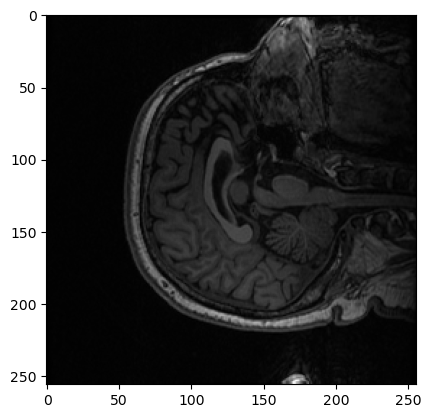

In [26]:
middle_slice = data[:, :, img.shape[-1] // 2 - 1]
plt.imshow(middle_slice)

(array([1545487., 5688642.,  543686.,  225292.,  185317.,  170605.,
         167420.,  163472.,  160184.,  161409.,  161888.,  164321.,
         169868.,  168432.,  156190.,  144238.,  130346.,  119294.,
         111224.,  107700.,  103474.,  100136.,   86878.,   68758.,
          54719.,   43491.,   35024.,   28076.,   22201.,   20043.,
          19453.,   19449.,   19382.,   19802.,   19359.,   18628.,
          17879.,   16705.,   15435.,   14349.,   13148.,   11835.,
          10566.,    9213.,    7760.,    6557.,    5447.,    4299.,
           3507.,    2679.,    2130.,    1631.,    1189.,     918.,
            767.,     596.,     449.,     320.,     242.,     176.,
            147.,      79.,      72.,      34.,      30.,      21.,
             14.,      13.,      11.,      10.,      11.,       3.,
              6.,       7.,       1.,       3.,       2.,       5.,
              5.,       1.,       3.,       4.,       1.,       1.,
              1.,       2.,       0.,       2., 

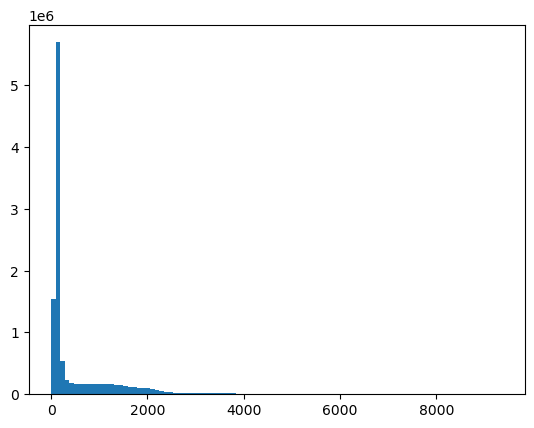

In [27]:
# Show histogram of the values in the 3D image.
plt.hist(np.ravel(data), bins=100)

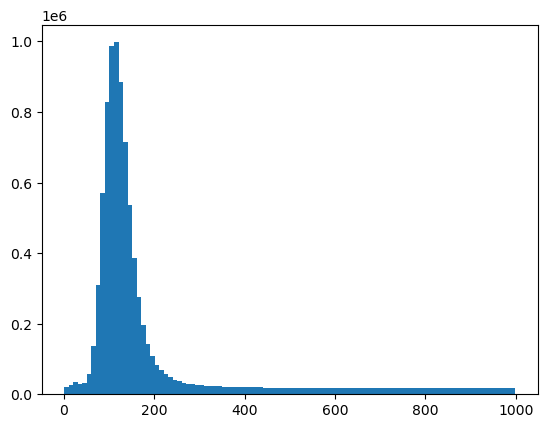

In [28]:
# Show histogram of the values in the 3D image, but selecting only voxels
# with values > 0 and < 1000
is_above_0 = data > 0
is_below_1000 = data < 1000
# Combine the two selections with & (True if both are True).
is_both = is_above_0 & is_below_1000
plt.hist(data[is_both], bins=100);

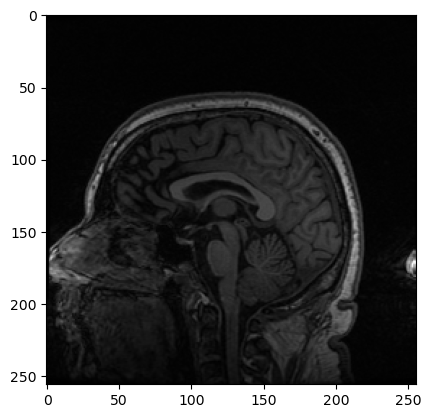

In [29]:
plt.imshow(middle_slice.T)

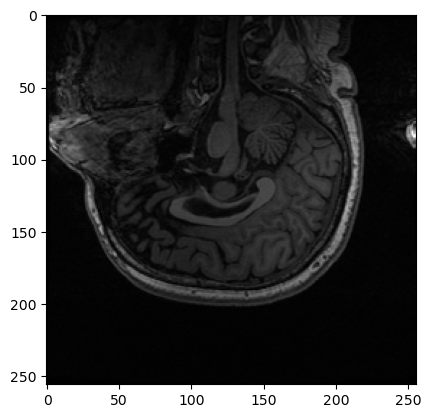

In [30]:
to_display = np.flipud(middle_slice.T)
plt.imshow(to_display)

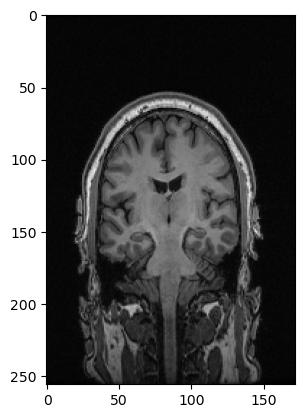

In [31]:
yz_slice = data[img.shape[0] // 2 - 1, :, :]
yz_slice.shape
plt.imshow(yz_slice)

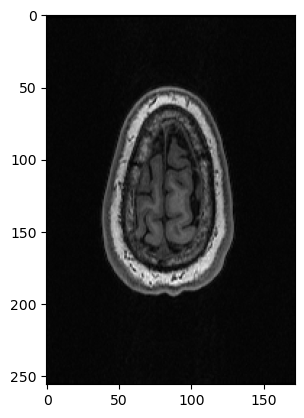

In [32]:
xz_slice = data[:, 78, :]
xz_slice.shape
plt.imshow(xz_slice)

<OrthoSlicer3D: C:/Users/User/Desktop/HDSI-BrainAge/renamed_t1_weighted/BD008_HC_39_2_YA.nii (172, 256, 256)>

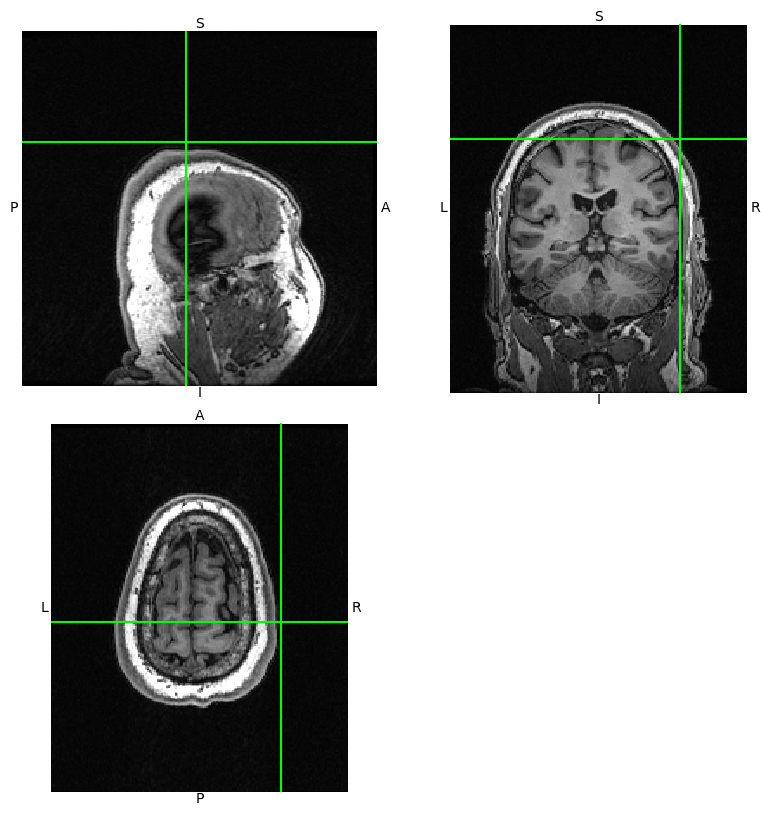

In [33]:
img.orthoview()

In [34]:
print(data)

[[[ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  ...
  [ 3.  5.  5. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  ...
  [ 5.  4.  5. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  ...
  [ 6.  6.  5. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]

 ...

 [[ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  ...
  [18. 22. 20. ...  7.  6.  6.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  ...
  [16. 23. 13. ... 11.  5.  6.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  

In [35]:
type(data)

numpy.memmap

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming your numpy.memmap array is stored in a variable called 'data'
# Replace 'data' with the actual variable name in your environment

# Extract x, y, z coordinates from your memmap_data
x = data[..., 0]  # Replace '0' with the index corresponding to x-coordinates
y = data[..., 1]  # Replace '1' with the index corresponding to y-coordinates
z = data[..., 2]  # Replace '2' with the index corresponding to z-coordinates

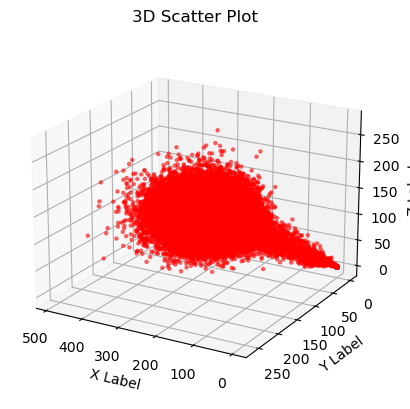

In [48]:
# Create a 3D plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x, y, z, c='r', marker='o', s=5, alpha=0.5)

# Customize the plot as needed
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

# Rotate the view - adjust the elev and azim values as needed
ax.view_init(elev=20, azim=120)

# Show the plot
plt.show()
